---

# Ансамбли моделей

В этой работе мы рассмотрим применение некоторых классических и хорошо себя показавших алгоритмов-ансамблей. Демонстрировать работу этих алгоритмов будем на данных о потреблении электричества.

# Описание набора данных

**Author**: M. Harries, J. Gama, A. Bifet
**Source**: [Joao Gama](http://www.inescporto.pt/~jgama/ales/ales_5.html) - 2009
**Please cite**: None

**Electricity** is a widely used dataset described by M. Harries and analyzed by J. Gama (see papers below). This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.

The dataset (originally named ELEC2) contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day. Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the class label. The class label identifies the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours (and removes the impact of longer term price trends).

The data was normalized by A. Bifet.

### Attribute information
* Date: date between 7 May 1996 to 5 December 1998. Here normalized between 0 and 1
* Day: day of the week (1-7)
* Period: time of the measurement (1-48) in half hour intervals over 24 hours. Here normalized between 0 and 1
* NSWprice: New South Wales electricity price, normalized between 0 and 1
* NSWdemand: New South Wales electricity demand, normalized between 0 and 1
* VICprice: Victoria electricity price, normalized between 0 and 1
* VICdemand: Victoria electricity demand, normalized between 0 and 1
* transfer: scheduled electricity transfer between both states, normalized between 0 and 1

### Relevant papers
M. Harries. Splice-2 comparative evaluation: Electricity pricing. Technical report, The University of South Wales, 1999.
J. Gama, P. Medas, G. Castillo, and P. Rodrigues. Learning with drift detection. In SBIA Brazilian Symposium on Artificial Intelligence, pages 286–295, 2004.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
way = "/content/drive/MyDrive/Colab_Notebooks/data_science/datasets/"

Mounted at /content/drive


# Разведочный анализ данных

Считайте набор данных в датафрейм

In [3]:
df = pd.read_csv(way + 'electricity_train.csv')

При помощи метода <code>.describe()</code> изучите набор данных «с высоты птичьего полета».

In [4]:
df.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
count,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000
mean,0.498293,4.006566,0.500560,0.057828,0.425939,0.003455,0.423024,0.500243,0.424536
std,0.339907,1.993551,0.294998,0.039052,0.163390,0.010175,0.120600,0.153098,0.494279
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031945,2.000000,0.255319,0.035187,0.309729,0.002283,0.373382,0.414912,0.000000
50%,0.456263,4.000000,0.510638,0.048787,0.444213,0.003467,0.422915,0.414912,0.000000
75%,0.880492,6.000000,0.765957,0.074457,0.536745,0.003467,0.468669,0.605263,1.000000
max,1.000000,7.000000,1.000000,1.000000,0.980809,1.000000,1.000000,0.959211,1.000000


Убедитесь в отсутствии пропусков. Имеет смысл проверить сбалансированность классов. Введите долю элементов класса $1$.

In [5]:
df['class'].sum() / df.shape[0]

0.4245358492648073

Постройте матрицу корреляций. Определите пару наиболее коррелированных признаков.

<Axes: >

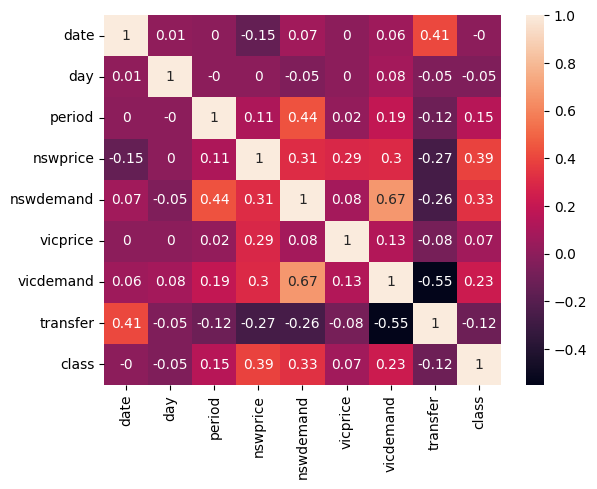

In [6]:
corr = df.corr().round(2)
sns.heatmap(corr, annot=True)

Постройте гистограммы распределений признаков.

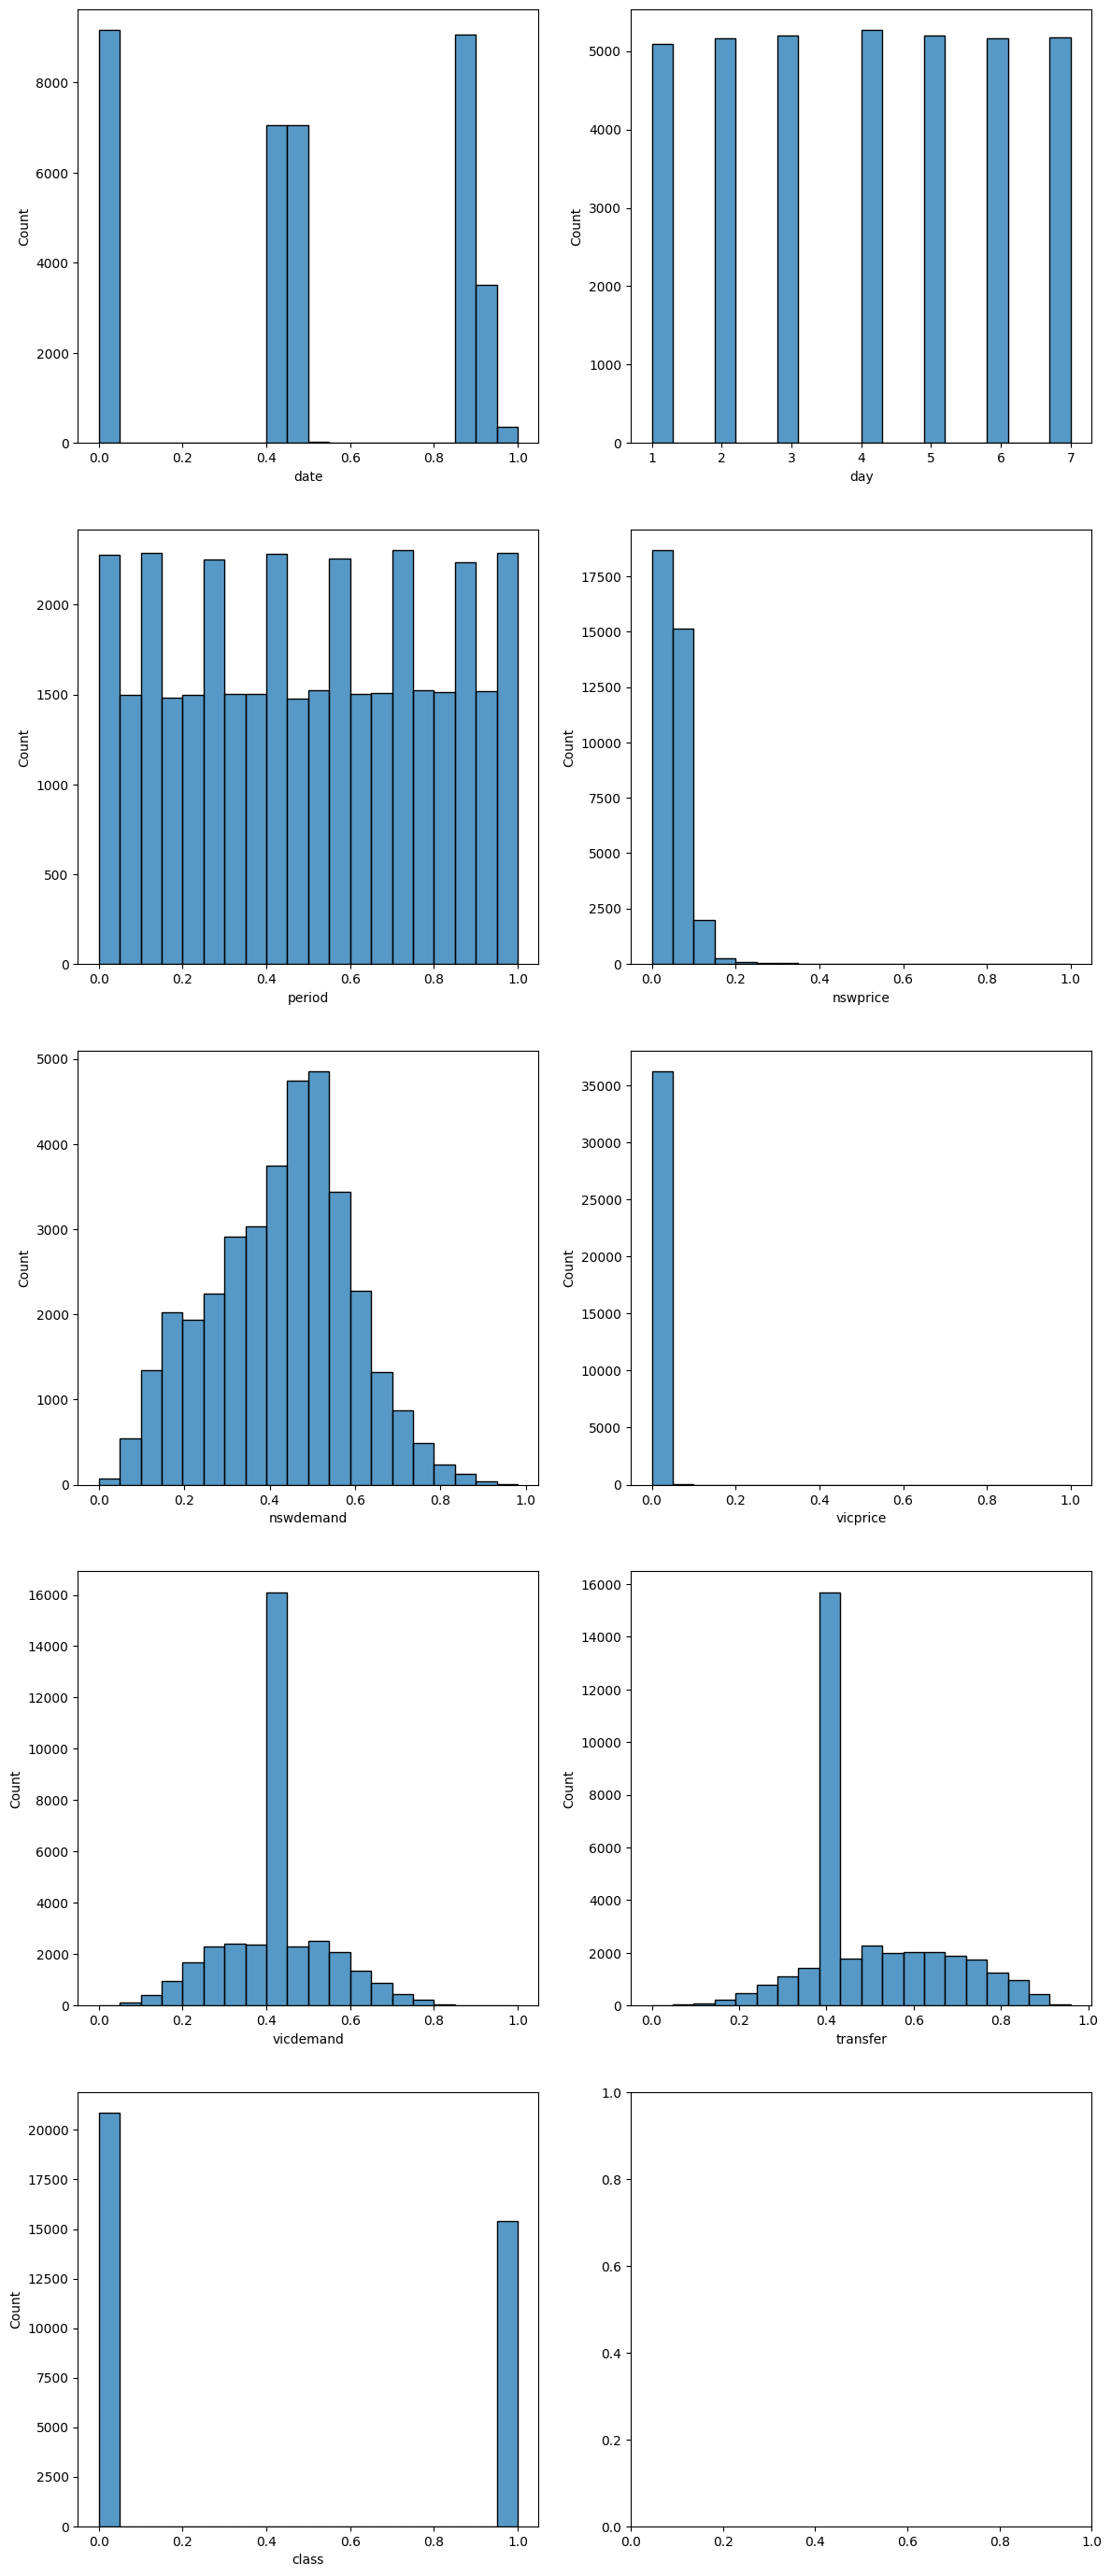

In [7]:
n_row = df.shape[1] // 2 if df.shape[1] % 2 == 0 else df.shape[1] // 2 + 1
n_col = 2

fig, axs = plt.subplots(n_row, n_col, figsize=(n_col * 7, n_row * 7))

# Создаем графики
for i, column in enumerate(df.columns):
    sns.histplot(df[column], bins = 20, ax=axs[i // n_col, i % n_col])

<Axes: xlabel='vicprice', ylabel='Count'>

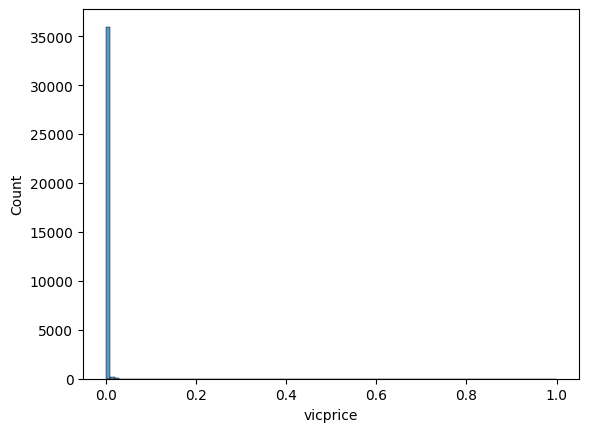

In [8]:
sns.histplot(df['vicprice'], bins = 100)

<Axes: xlabel='nswdemand', ylabel='Count'>

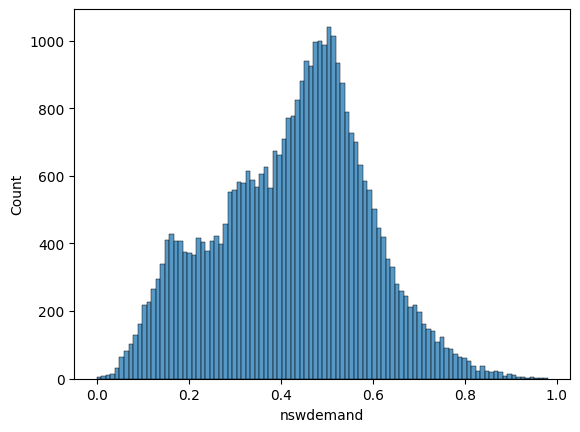

In [9]:
sns.histplot(df['nswdemand'], bins = 100)

Из полученных иллюстраций видно, что в данных, скорее всего, как и ожидалось, есть некоторая периодичность. Более того, похоже, за нас уже поработали над заполнением пропусков или обработкой выбросов

# Random Forests Classifier

In [10]:
random_st = 11

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(df.drop('class', axis = 1), df['class'],
                                                    test_size=0.2, random_state = random_st)

Обучите модель <code>sklearn.ensemble.RandomForestClassifier</code> на тренировочных данных с параметрами, указанными в вашем индивидуальном задании.

In [34]:
from sklearn.ensemble import RandomForestClassifier

rand_for = RandomForestClassifier(random_state = random_st)

In [35]:
rand_for.fit(x_train, y_train)

RandomForestClassifier(random_state=11)

Постройте <code>classification_report</code> полученной модели на **тренировочных данных**. Введите значение точности модели на **тренировочных данных**.

In [37]:
from sklearn.metrics import classification_report

y_pred_train = rand_for.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16668
           1       1.00      1.00      1.00     12331

    accuracy                           1.00     28999
   macro avg       1.00      1.00      1.00     28999
weighted avg       1.00      1.00      1.00     28999



Получили переобучение. Что же, еще раз можно ответить, что деревья принятия решений весьма склонны к переобучению.

## Добавление к лесу деревьев GridSearchCV

При помощи <code>sklearn.model_selection.GridSearchCV</code> обучите <code>RandomForestClassifier</code> на тренировочных данных c параметрами, указанными в вашем индивидуальном задании.

Подбираемые параметры:

<code>{'n_estimators': [100,300,500], 'max_leaf_nodes': list(range(6,10)), 'min_samples_leaf': [1,2,3]}</code>

In [39]:
from sklearn.model_selection import GridSearchCV

params_grid = {'n_estimators': [100,300,500],
  'max_leaf_nodes': list(range(6,10)),
  'min_samples_leaf': [1,2,3]}

grscv = GridSearchCV(RandomForestClassifier(
    bootstrap=False,
    class_weight='balanced',
    n_jobs=-1,
    max_features='sqrt',
    random_state=random_st),
    params_grid,
    verbose=4,
    cv=3)

In [40]:
grscv.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.774 total time=   3.6s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.766 total time=   2.3s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.770 total time=   2.0s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.773 total time=   3.5s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.770 total time=   3.5s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.773 total time=   4.0s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.773 total time=   7.6s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.771 total time=   5.8s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.774 total time=   8.2s
[CV 1/3] END max_leaf_nodes=6

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              n_jobs=-1, random_state=11),
             param_grid={'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             verbose=4)

Выберите лучшую модель. Рекомендуем использовать поле <code>best_estimator_</code> объекта класса <code>grid_search</code>. В поле <code>best_params_</code> этого же объекта можно найти параметры лучшей модели.

In [41]:
print("Лучшие параметры: ", grscv.best_params_)

Лучшие параметры:  {'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'n_estimators': 100}


In [42]:
best_model = grscv.best_estimator_

Постройте <code>classification_report</code> полученной модели на **тренировочных данных**. Введите значение точности модели на **тренировочных данных**.

In [45]:
pred2 = best_model.predict(x_train)
print(classification_report(y_train, pred2, digits = 4))

              precision    recall  f1-score   support

           0     0.7782    0.8776    0.8249     16668
           1     0.8000    0.6618    0.7244     12331

    accuracy                         0.7859     28999
   macro avg     0.7891    0.7697    0.7746     28999
weighted avg     0.7875    0.7859    0.7822     28999



Постройте <code>classification_report</code> полученной модели на **тестовых данных**. Введите значение точности модели на **тестовых данных**.

In [46]:
pred3 = best_model.predict(x_test)
print(classification_report(y_test, pred3, digits = 4))

              precision    recall  f1-score   support

           0     0.7844    0.8729    0.8262      4192
           1     0.7938    0.6710    0.7273      3058

    accuracy                         0.7877      7250
   macro avg     0.7891    0.7719    0.7768      7250
weighted avg     0.7883    0.7877    0.7845      7250



От переобучения избавились, но точность кажется низкой.

Один из плюсов случайного леса — можно посмотреть на важность признаков при классификации (обратная задача). Значения важности можно найти в поле <code>feature_importances_</code> модели. Определите название самого важного признака модели.

In [49]:
pd.DataFrame(best_model.feature_importances_,
                                   index = x_train.columns, columns = ['importance'])

,importance
date,0.054839
day,0.012206
period,0.084642
nswprice,0.521986
nswdemand,0.148809
vicprice,0.128893
vicdemand,0.040046
transfer,0.008580


Попробуем улучшить результаты, используя другие виды ансамблей.

# Voting Classifier

Обучает все модели, поданные на вход, и предсказывает финальный результат либо по большему числу одинаковых ответов, которые дали модели (hard), либо вычисляет вероятность отнесения объектов к классам по всем моделям и берет argmax.

Используйте объект <code>sklearn.ensemble.VotingClassifier</code> с параметром <code>voting='hard'</code>. В качестве базовых алгоритмов используйте классификаторы с соответствующими параметрами, указанными в вашем индивидуальном задании. Обучите модель на тренировочных данных

In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC

vot_clas = VotingClassifier(estimators = [('lr', LogisticRegression(solver='liblinear', random_state=11)),
                                          ('svc', SVC(random_state=11)),
                                          ('sgd', SGDClassifier(random_state=11))],
                            voting = 'hard')

In [53]:
vot_clas.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=11,
                                                 solver='liblinear')),
                             ('svc', SVC(random_state=11)),
                             ('sgd', SGDClassifier(random_state=11))])

Вычислите точность модели на **тренировочных данных**

In [55]:
pred4 = vot_clas.predict(x_train)
print(classification_report(y_train, pred4, digits = 4))

              precision    recall  f1-score   support

           0     0.7401    0.8742    0.8016     16668
           1     0.7748    0.5851    0.6667     12331

    accuracy                         0.7513     28999
   macro avg     0.7575    0.7297    0.7342     28999
weighted avg     0.7549    0.7513    0.7442     28999



Вычислите точность модели на **тестовых данных**

In [56]:
pred5 = vot_clas.predict(x_test)
print(classification_report(y_test, pred5, digits = 4))

              precision    recall  f1-score   support

           0     0.7510    0.8748    0.8082      4192
           1     0.7782    0.6024    0.6791      3058

    accuracy                         0.7599      7250
   macro avg     0.7646    0.7386    0.7436      7250
weighted avg     0.7625    0.7599    0.7537      7250



# Bagging Classifier

Создает несколько объектов одного класса (несколько моделей) и обучает их на непересекающихся подмножествах тренировочных данных, а дальше усредняет ответы.

На основе <code>sklearn.ensemble.BaggingClassifier</code>, используя <code>DecisionTreeClassifier</code> обучите модель с параметрами, указанными в вашем индивидуальном задании на тренировочных данных.

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_cl = BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5,
    max_features=0.5,
    bootstrap=False,
  random_state = random_st)


In [58]:
bag_cl.fit(x_train,y_train)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.5, max_samples=0.5, random_state=11)

Вычислите точность модели на **тренировочных данных**

In [60]:
bag_cl_pred = bag_cl.predict(x_train)
print(classification_report(y_train, bag_cl_pred , digits=4))

              precision    recall  f1-score   support

           0     0.9731    0.9863    0.9796     16668
           1     0.9811    0.9632    0.9721     12331

    accuracy                         0.9764     28999
   macro avg     0.9771    0.9747    0.9758     28999
weighted avg     0.9765    0.9764    0.9764     28999



Вычислите точность модели на **тестовых данных**

In [61]:
bag_cl_pred2 = bag_cl.predict(x_test)
print(classification_report(y_test, bag_cl_pred2,digits=3))

              precision    recall  f1-score   support

           0      0.859     0.911     0.885      4192
           1      0.868     0.796     0.830      3058

    accuracy                          0.863      7250
   macro avg      0.864     0.854     0.857      7250
weighted avg      0.863     0.863     0.862      7250



# Gradient Boosting Classifier

Градиентный бустинг работает примерно так: создается несколько объектов класса (несколько моделей), они выстраиваются в цепочку так, чтобы каждый следующий пытался исправить ошибки предыдущего. Склонен к переобучению.

Обучите модель на основе <code>sklearn.ensemble.GradientBoostingClassifier</code> с параметрами, указанными в вашем индивидуальном задании на тренировочных данных.

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(n_estimators=500, learning_rate=0.8, random_state = random_st, max_depth=2)


In [63]:
grad_boost.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, n_estimators=500,
                           random_state=11)

Вычислите точность модели на **тренировочных данных**

In [64]:
grad_boost_pred = grad_boost.predict(x_train)
print(classification_report(y_train, grad_boost_pred , digits=4))

              precision    recall  f1-score   support

           0     0.8890    0.9064    0.8976     16668
           1     0.8701    0.8471    0.8584     12331

    accuracy                         0.8812     28999
   macro avg     0.8795    0.8767    0.8780     28999
weighted avg     0.8810    0.8812    0.8809     28999



Вычислите точность модели на **тестовых данных**

In [66]:
grad_boost_pred2 = grad_boost.predict(x_test)
print(classification_report(y_test, grad_boost_pred2,digits=4))

              precision    recall  f1-score   support

           0     0.8838    0.8948    0.8893      4192
           1     0.8533    0.8388    0.8460      3058

    accuracy                         0.8712      7250
   macro avg     0.8686    0.8668    0.8676      7250
weighted avg     0.8710    0.8712    0.8710      7250



# AdaBoost Classifier

Работает похожим на градиентный бустинг образом, только последующие модели не пытаются исправить ошибку предыдущих: сначала первый объект обучается на всем датасете, а следующий на основе опыта предыдущего обновляет свои веса так, чтобы исправлять ошибочные предсказания.

На основе <code>sklearn.ensemble.AdaBoostClassifier</code>, используя <code>DecisionTreeClassifier</code> обучите модель с параметрами, указанными в вашем индивидуальном задании на тренировочных данных.

In [68]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    n_estimators=300,
    learning_rate=0.5,
    random_state = random_st)


In [69]:
ada_boost.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3),
                   learning_rate=0.5, n_estimators=300, random_state=11)

Вычислите точность модели на **тренировочных данных**

In [70]:
ada_boost_pred = ada_boost.predict(x_train)
print(classification_report(y_train, ada_boost_pred , digits=4))

              precision    recall  f1-score   support

           0     0.9591    0.9339    0.9463     16668
           1     0.9137    0.9462    0.9296     12331

    accuracy                         0.9391     28999
   macro avg     0.9364    0.9400    0.9380     28999
weighted avg     0.9398    0.9391    0.9392     28999



Вычислите точность модели на **тестовых данных**

In [71]:
ada_boost_pred2 = ada_boost.predict(x_test)
print(classification_report(y_test, ada_boost_pred2,digits=4))

              precision    recall  f1-score   support

           0     0.9277    0.9034    0.9154      4192
           1     0.8722    0.9035    0.8876      3058

    accuracy                         0.9034      7250
   macro avg     0.8999    0.9035    0.9015      7250
weighted avg     0.9043    0.9034    0.9037      7250



# Stacking Classifier

Обучает несколько объектов класса (несколько моделей) на всем наборе данных, а после — обучает отдельный классификатор на метданных — ответах, полученных обученными ранее моделями.

Используйте объект <code>sklearn.ensemble.StackingClassifier</code>. Базовые алгоритмы и решающий, а также соответствующие параметры указанны в вашем индивидуальном задании. Обучите модель на тренировочных данных.

In [72]:
from sklearn.ensemble import StackingClassifier

base_learners = [
                 ('rfc', RandomForestClassifier(random_state = random_st)),
                 ('svc', SVC(random_state = random_st))
                ]

stack_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(random_state = random_st))


In [73]:
stack_clf.fit(x_train,y_train)

StackingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=11)),
                               ('svc', SVC(random_state=11))],
                   final_estimator=LogisticRegression(random_state=11))

Вычислите точность модели на **тренировочных данных**

In [74]:
stack_clf_pred = stack_clf.predict(x_train)
print(classification_report(y_train, stack_clf_pred , digits=4))

              precision    recall  f1-score   support

           0     0.9995    1.0000    0.9997     16668
           1     1.0000    0.9993    0.9996     12331

    accuracy                         0.9997     28999
   macro avg     0.9997    0.9996    0.9997     28999
weighted avg     0.9997    0.9997    0.9997     28999



Вычислите точность модели на **тестовых данных**

In [75]:
stack_clf_pred2 = stack_clf.predict(x_test)
print(classification_report(y_test, stack_clf_pred2,digits=4))

              precision    recall  f1-score   support

           0     0.9132    0.9213    0.9172      4192
           1     0.8908    0.8800    0.8853      3058

    accuracy                         0.9039      7250
   macro avg     0.9020    0.9006    0.9013      7250
weighted avg     0.9037    0.9039    0.9038      7250

